<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebook/overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 数据集

TensorFlow Datasets 提供了一系列可以和 TensorFlow 配合使用的数据集。它负责下载和准备数据，以及构建 [`tf.data.Dataset`](https://tensorflow.google.cn/api_docs/python/tf/data/Dataset)。

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://tensorflow.google.cn/datasets/overview"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png" />在 tensorflow.google.cn 上查看</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png" />在 Google Colab 运行</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png" />在 Github 上查看源代码</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/datasets/overview.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png" />下载 notebook</a>
  </td>
</table>

Note: 我们的 TensorFlow 社区翻译了这些文档。因为社区翻译是尽力而为， 所以无法保证它们是最准确的，并且反映了最新的
[官方英文文档](https://tensorflow.google.cn/?hl=en)。如果您有改进此翻译的建议， 请提交 pull request 到
[tensorflow/docs](https://github.com/tensorflow/docs) GitHub 仓库。要志愿地撰写或者审核译文，请加入
[docs-zh-cn@tensorflow.org Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-zh-cn)。

## 安装

`pip install tensorflow-datasets`

注意使用 `tensorflow-datasets` 的前提是已经安装好 TensorFlow，目前支持的版本是 `tensorflow` (或者 `tensorflow-gpu`) >= `1.15.0`

In [ ]:
#!pip install -q tensorflow tensorflow-datasets matplotlib
!pip install tensorflow-datasets==3.2.1

     |████████████████████████████████| 3.4 MB 7.0 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

## Eager execution

TensorFlow 数据集同时兼容 TensorFlow [Eager 模式](https://tensorflow.google.cn/guide/eager) 和图模式。在这个 colab 环境里面，我们的代码将通过 Eager 模式执行。

In [ ]:
tf.compat.v1.enable_eager_execution()

## 列出可用的数据集

每一个数据集（dataset）都实现了抽象基类 [`tfds.core.DatasetBuilder`](https://www.tensorflow.google.cn/datasets/api_docs/python/tfds/core/DatasetBuilder) 来构建。你可以通过 `tfds.list_builders()` 列出所有可用的数据集。

你可以通过 [数据集文档页](https://www.tensorflow.google.cn/datasets/catalog/overview) 查看所有支持的数据集及其补充文档。

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'ai2_arc',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist

## `tfds.load`: 一行代码获取数据集

[`tfds.load`](https://www.tensorflow.google.cn/datasets/api_docs/python/tfds/load) 是构建并加载 `tf.data.Dataset` 最简单的方式。

`tf.data.Dataset` 是构建输入流水线的标准 TensorFlow 接口。如果你对这个接口不熟悉，我们强烈建议你阅读 [TensorFlow 官方指南](https://www.tensorflow.google.cn/guide/datasets)。

下面，我们先加载 MNIST 训练数据。这个步骤会下载并准备好该数据，除非你显式指定 `download=False`。值得注意的是，一旦该数据准备好了，后续的 `load` 命令便不会重新下载，可以重复使用准备好的数据。
你可以通过指定 `data_dir=` (默认是 `~/tensorflow_datasets/`) 来自定义数据保存/加载的路径。

In [ ]:
cifar10_train = tfds.load(name="cifar10", split="train")
assert isinstance(cifar10_train, tf.data.Dataset)
print(cifar10_train)

<PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>


加载数据集时，将使用规范的默认版本。 但是，建议你指定要使用的数据集的主版本，并在结果中表明使用了哪个版本的数据集。更多详情请参考[数据集版本控制文档](https://github.com/tensorflow/datasets/blob/master/docs/)。

In [ ]:
cifar10 = tfds.load("cifar10:3.*.*")

## 特征字典

所有 `tfds` 数据集都包含将特征名称映射到 Tensor 值的特征字典。 典型的数据集（如 MNIST）将具有2个键：`"image"` 和 `"label"`。 下面我们看一个例子。

注意：在图模式（graph mode）下，请参阅 [tf.data 指南](https://www.tensorflow.google.cn/guide/datasets#creating_an_iterator) 以了解如何在 `tf.data.Dataset` 上进行迭代。

Label: 7


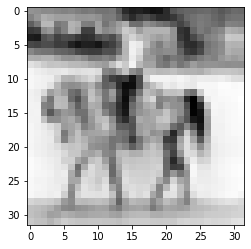

In [ ]:
for cifar10_example in cifar10_train.take(1):  # 只取一个样本
    image, label = cifar10_example["image"], cifar10_example["label"]

    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

## `DatasetBuilder`

`tfds.load` 实际上是一个基于 `DatasetBuilder` 的简单方便的包装器。我们可以直接使用 MNIST `DatasetBuilder` 实现与上述相同的操作。

In [ ]:
cifar10_builder = tfds.builder("cifar10")
cifar10_builder.download_and_prepare()
cifar10_train = cifar10_builder.as_dataset(split="train")
cifar10_train

<PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>

## 输入流水线

一旦有了 `tf.data.Dataset` 对象，就可以使用 [`tf.data` 接口](https://www.tensorflow.google.cn/guide/datasets) 定义适合模型训练的输入流水线的其余部分。

在这里，我们将重复使用数据集，以便有无限的样本流，然后随机打乱并创建大小为32的批。

In [ ]:
cifar10_train = cifar10_train.repeat().shuffle(1024).batch(32)

# prefetch 将使输入流水线可以在模型训练时异步获取批处理。
cifar10_train = cifar10_train.prefetch(tf.data.experimental.AUTOTUNE)

# 现在你可以遍历数据集的批次并在 mnist_train 中训练批次：
#   ...

## 数据集信息（DatasetInfo）

生成后，构建器将包含有关数据集的有用信息：

In [ ]:
info = cifar10_builder.info
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



`DatasetInfo` 还包含特征相关的有用信息：

In [ ]:
print(info.features)
print(info.features["label"].num_classes)
print(info.features["label"].names)

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})
10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


你也可以通过 `tfds.load` 使用 `with_info = True` 加载 `DatasetInfo`。

In [ ]:
cifar10_test, info = tfds.load("cifar10", split="test", with_info=True)
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



## 可视化

对于图像分类数据集，你可以使用 `tfds.show_examples` 来可视化一些样本。

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


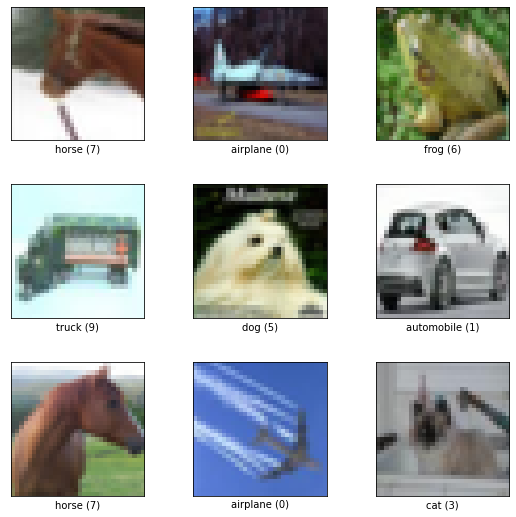

In [ ]:
fig = tfds.show_examples(info, cifar10_test)